# Creating a Dashboard

In [22]:
%matplotlib inline

In [43]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import seaborn as sns
from ipywidgets import interact
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [49]:
tweets = pd.read_json('climate_fly_2019.json', lines=True)
tweets.head(2)

,tweet_id,author_id,created_at,text,lang,source,likes,quote_count,reply_count,retweet_count,author_created_at,author_username,author_name,author_description,author_followers_count,author_following_count,author_listed_count,author_tweet_count
0,1136756117042655232,2921282954,2019-06-06 22:05:52+00:00,RT @AngleseaAC: “Each additional metric ton of carbon dioxide or its equivalent — your share of the emissions on a cross-country flight one…,en,Twitter for Android,0,0,0,32,2014-12-07 05:12:32+00:00,ausblueprint,💧australiablueprint,#climatechange #auspol #nature #cycling #regenerative #economy #wildlife #greenyourworkplace #recycle #vegetarian #plasticfree #innovation #rubbishpickup,1735,1735,18,62226
1,1136755941272166400,555046395,2019-06-06 22:05:10+00:00,RT @UlrikaModeer: Indeed- the #transport sector needs to transform if we are to beat #AirPollution and combat #ClimateChange👇🏼 Swedes turn…,en,Twitter for iPhone,0,0,0,6,2012-04-16 08:27:15+00:00,GunnelANycander,Gunnel A Nycander,"Policyrådgivare vid @Act_Svk. Fokus på frågor om utveckling, utvecklingsbistånd och social trygghet. Tweetsen är mina egna.",869,432,9,6739


In [57]:
smaller_set = tweets[["created_at", "lang",'text',"source","retweet_count",'likes']]

In [58]:
@interact(hue=['lang','source'])
def plot(hue):
    _ = sns.pairplot(smaller_set,hue=hue)

interactive(children=(Dropdown(description='hue', options=('lang', 'source'), value='lang'), Output()), _dom_c…

In [39]:
full_text=' '.join([i for i in tweets['text']])

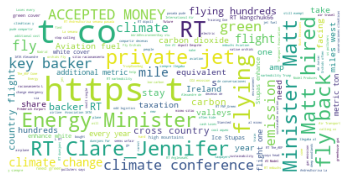

In [44]:
wordcloud = WordCloud().generate(full_text)
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(full_text),max_font_size=40, relative_scaling=.5).generate(full_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [71]:
smaller_set_with_terms = tweets[["created_at", "lang",'text',"source","retweet_count",'likes']]
smaller_set_with_terms.head(2)

,created_at,lang,text,source,retweet_count,likes
0,2019-06-06 22:05:52+00:00,en,RT @AngleseaAC: “Each additional metric ton of carbon dioxide or its equivalent — your share of the emissions on a cross-country flight one…,Twitter for Android,32,0
1,2019-06-06 22:05:10+00:00,en,RT @UlrikaModeer: Indeed- the #transport sector needs to transform if we are to beat #AirPollution and combat #ClimateChange👇🏼 Swedes turn…,Twitter for iPhone,6,0


In [ ]:
smaller_set_with_terms['private_jet'] = smaller_set_with_terms['text'].str.contains('private jet')
smaller_set_with_terms['accepted_money'] = smaller_set_with_terms['text'].str.contains('accepted money')
smaller_set_with_terms['climate_conference'] = smaller_set_with_terms['text'].str.contains('climate conference')
smaller_set_with_terms['flying_hundreds'] = smaller_set_with_terms['text'].str.contains('flying hundreds')

In [84]:
smaller_set_with_terms.head()

,created_at,lang,text,source,retweet_count,likes,private_jet,accepted_money,climate_conference,flying_hundreds
0,2019-06-06 22:05:52+00:00,en,RT @AngleseaAC: “Each additional metric ton of carbon dioxide or its equivalent — your share of the emissions on a cross-country flight one…,Twitter for Android,32,0,False,False,False,False
1,2019-06-06 22:05:10+00:00,en,RT @UlrikaModeer: Indeed- the #transport sector needs to transform if we are to beat #AirPollution and combat #ClimateChange👇🏼 Swedes turn…,Twitter for iPhone,6,0,False,False,False,False
2,2019-06-06 22:03:25+00:00,en,RT @LACIncubator: Aviation history happened today!! @AmpaireInc holds first electric flight. In just a few years you can buy a ticket to fl…,Twitter for iPhone,8,0,False,False,False,False
3,2019-06-06 22:03:09+00:00,en,RT @markmobility: Trump is flying hundreds of miles to stay at @TrumpDoonbeg.\n- Which he bought with cash (!?)\n- Loses $$$ every year\n- Is…,Twitter Web App,227,0,False,False,False,True
4,2019-06-06 22:01:49+00:00,en,RT @tfgreenairport: What better way to be welcomed to the #oceanstate than with a traditional water salute! See how we did it for the fligh…,Twitter for iPhone,2,0,False,False,False,False


interactive(children=(Dropdown(description='hue', options=('private_jet', 'accepted_money', 'climate_conferenc…

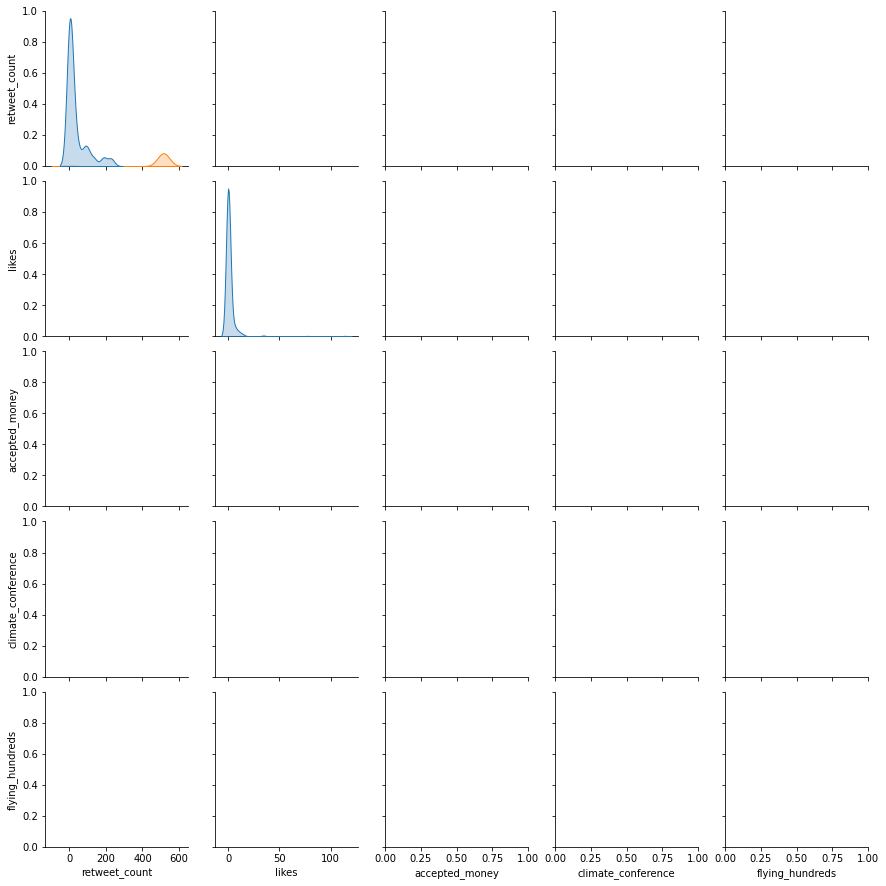

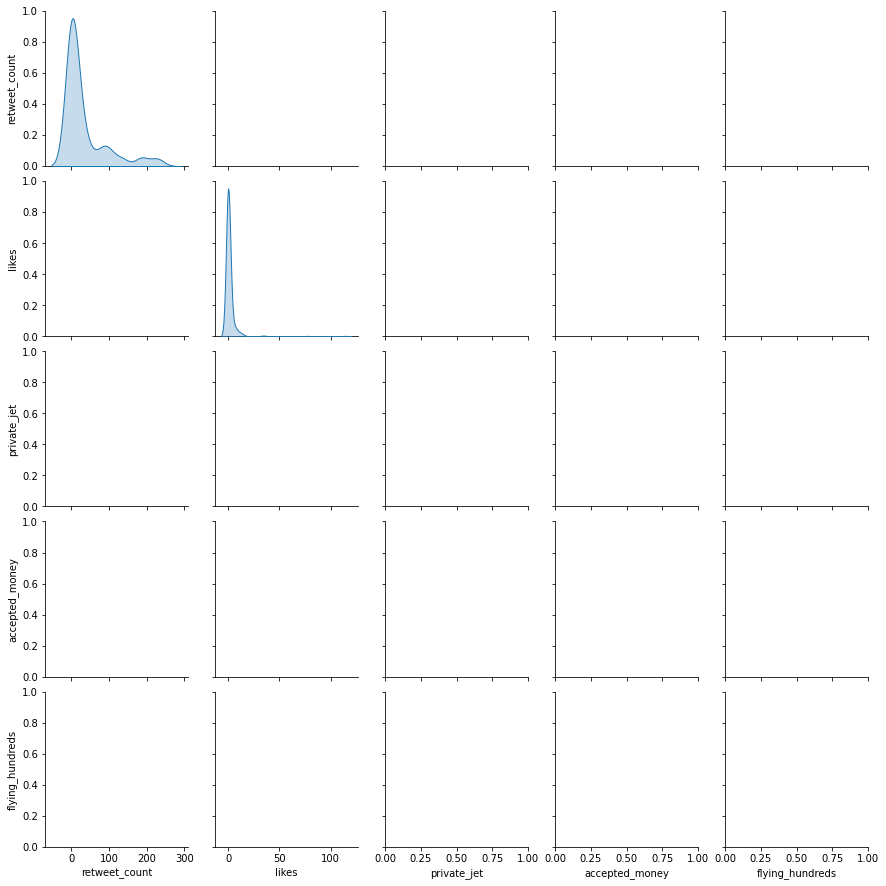

In [87]:
@interact(hue=['private_jet','accepted_money','climate_conference','flying_hundreds'])
def plot(hue):
    _ = sns.pairplot(smaller_set_with_terms,hue=hue)

In [93]:
@interact(hue=['private_jet','accepted_money','climate_conference','flying_hundreds'])
def plot(hue):
    _ = sns.categorical(smaller_set_with_terms,hue=hue)

interactive(children=(Dropdown(description='hue', options=('private_jet', 'accepted_money', 'climate_conferenc…